In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN, LSTM

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
df = pd.read_csv("BAJAJ-AUTO.csv")

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,3972485,2.481245e+14,NaN,1202933,0.3028
1,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.0,580.30,595.50,593.15,606.43,1751063,1.061901e+14,NaN,369389,0.2110
2,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.9,561.65,605.10,608.15,608.75,1652355,1.005877e+14,NaN,898602,0.5438
3,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.4,576.00,600.00,599.45,600.98,669269,4.022165e+13,NaN,449951,0.6723
4,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.0,538.00,576.25,571.70,565.55,1262117,7.137937e+13,NaN,936432,0.7420


In [4]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3095,2020-11-23,BAJAJ-AUTO,EQ,3058.55,3068.0,3085.0,3030.6,3072.70,3077.75,3062.45,493600,1.511627e+14,23310.0,181731,0.3682
3096,2020-11-24,BAJAJ-AUTO,EQ,3077.75,3077.0,3122.0,3053.0,3094.90,3095.70,3096.37,858928,2.659557e+14,53118.0,276739,0.3222
3097,2020-11-25,BAJAJ-AUTO,EQ,3095.70,3100.0,3160.0,3041.0,3045.00,3051.25,3112.04,1219151,3.794049e+14,64380.0,190593,0.1563
3098,2020-11-26,BAJAJ-AUTO,EQ,3051.25,3053.0,3150.0,3053.0,3145.00,3129.20,3096.73,1264680,3.916374e+14,60615.0,356777,0.2821
3099,2020-11-27,BAJAJ-AUTO,EQ,3129.20,3144.9,3249.0,3135.7,3170.25,3173.55,3204.30,2548347,8.165657e+14,93783.0,657652,0.2581


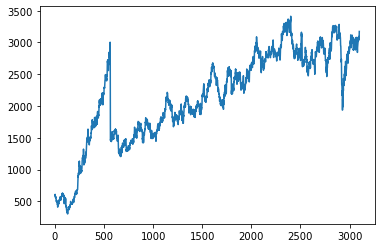

In [5]:
plt.plot(df["Close"])

In [6]:
df.shape

(3100, 15)

In [7]:
train = df["Close"][:2170]
test = df["Close"][2170:]

In [8]:
train.shape

(2170,)

In [9]:
test.shape

(930,)

In [10]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(np.array(train).reshape(-1,1))
test_scaled = scaler.transform(np.array(test).reshape(-1,1))

In [11]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        sample = dataset[i:(i+time_step), 0]    
        X.append(sample)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

In [12]:
time_step = 50
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

In [13]:
print(X_train.shape)
print(X_test.shape)

(2119, 50)
(879, 50)


In [14]:
# reshape into (samples, time steps, features) 
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test  = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [15]:
print(X_train.shape)
print(X_test.shape)

(2119, 50, 1)
(879, 50, 1)


In [16]:
model = Sequential()
model.add(SimpleRNN(32, return_sequences=True, input_shape=(time_step,1)))
model.add(SimpleRNN(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.fit(X_train,y_train, epochs=20, batch_size=32)

Epoch 1/20
67/67 [==============================] - 2s 12ms/step - loss: 0.0594
Epoch 2/20
67/67 [==============================] - 1s 14ms/step - loss: 0.0016
Epoch 3/20
67/67 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 4/20
67/67 [==============================] - 1s 12ms/step - loss: 9.9688e-04
Epoch 5/20
67/67 [==============================] - 1s 12ms/step - loss: 8.8079e-04
Epoch 6/20
67/67 [==============================] - 1s 12ms/step - loss: 9.0445e-04
Epoch 7/20
67/67 [==============================] - 1s 13ms/step - loss: 7.5397e-04
Epoch 8/20
67/67 [==============================] - 1s 14ms/step - loss: 8.1282e-04
Epoch 9/20
67/67 [==============================] - 1s 14ms/step - loss: 7.1421e-04
Epoch 10/20
67/67 [==============================] - 1s 12ms/step - loss: 6.0386e-04
Epoch 11/20
67/67 [==============================] - 1s 12ms/step - loss: 5.3694e-04
Epoch 12/20
67/67 [==============================] - 1s 14ms/step - loss: 5.8889e-04
E

In [18]:
y_pred = model.predict(X_test)
mean_squared_error(y_test,y_pred)

0.0003990128458580506

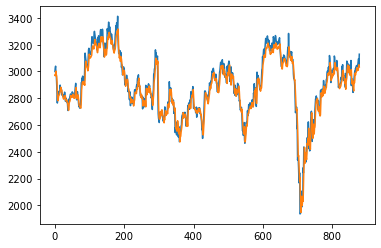

In [19]:
plt.figure()
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)))
plt.plot(scaler.inverse_transform(y_pred))
plt.show()

In [20]:
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.fit(X_train,y_train, epochs=20, batch_size=32)

Epoch 1/20
67/67 [==============================] - 8s 39ms/step - loss: 0.0308
Epoch 2/20
67/67 [==============================] - 3s 39ms/step - loss: 0.0023
Epoch 3/20
67/67 [==============================] - 3s 40ms/step - loss: 0.0021
Epoch 4/20
67/67 [==============================] - 3s 40ms/step - loss: 0.0020
Epoch 5/20
67/67 [==============================] - 3s 41ms/step - loss: 0.0019
Epoch 6/20
67/67 [==============================] - 3s 39ms/step - loss: 0.0018
Epoch 7/20
67/67 [==============================] - 3s 38ms/step - loss: 0.0016
Epoch 8/20
67/67 [==============================] - 3s 38ms/step - loss: 0.0016
Epoch 9/20
67/67 [==============================] - 3s 39ms/step - loss: 0.0015
Epoch 10/20
67/67 [==============================] - 2s 37ms/step - loss: 0.0017
Epoch 11/20
67/67 [==============================] - 3s 40ms/step - loss: 0.0013
Epoch 12/20
67/67 [==============================] - 3s 39ms/step - loss: 0.0014
Epoch 13/20
67/67 [==================

In [22]:
y_pred = model.predict(X_test)
mean_squared_error(y_test,y_pred)

0.0014908201991205596

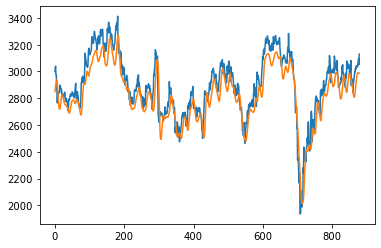

In [23]:
plt.figure()
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)))
plt.plot(scaler.inverse_transform(y_pred))
plt.show()

In [24]:
# next 50 days

days = 50
last_input = X_test[-1]
last_output = y_pred[-1]
y_forecast = []

for i in range(1,days+1):
    last_input = np.append(last_input[1:], last_output)
    last_output = model.predict(last_input.reshape(1,50,1))
    y_forecast.append(last_output[0][0])
    

In [25]:
all_predictions = np.append(y_pred,y_forecast)

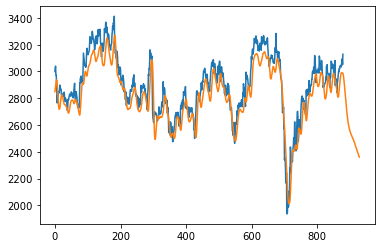

In [26]:
plt.figure()
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)))
plt.plot(scaler.inverse_transform(all_predictions.reshape(-1,1)))
plt.show()